<a href="https://colab.research.google.com/github/waltechel/tensorflow-ml-nlp-tf2/blob/master/4.TEXT_CLASSIFICATION/4.1.2.EDA%26preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4.1.2 µ¥ÀÌÅÍ ºÐ¼® ¹× ÀüÃ³¸®

### µ¥ÀÌÅÍ ºÒ·¯¿À±â ¹× ºÐ¼®ÇÏ±â

4.1 Àå¿¡¼­ »ç¿ëÇÒ µ¥ÀÌÅÍÀÎ ¿µÈ­ ¸®ºä µ¥ÀÌÅÍ¸¦ ºÒ·¯¿Â ÈÄ Å½»öÀû µ¥ÀÌÅÍ ºÐ¼® °úÁ¤À» ÁøÇàÇÑ´Ù.  
µ¥ÀÌÅÍ ºÐ¼®Àº ´ÙÀ½ÀÇ ¼ø¼­·Î ÁøÇàÇÑ´Ù.

* µ¥ÀÌÅÍ Å©±â
* µ¥ÀÌÅÍÀÇ °³¼ö
* °¢ ¸®ºäÀÇ ¹®ÀÚ ±æÀÌ ºÐÆ÷
* ¸¹ÀÌ »ç¿ëµÈ ´Ü¾î
* ±à, ºÎÁ¤ µ¥ÀÌÅÍÀÇ ºÐÆ÷
* °¢ ¸®ºäÀÇ ´Ü¾î °³¼ö ºÐÆ÷
* Æ¯¼ö¹®ÀÚ ¹× ´ë, ¼Ò¹®ÀÚ ºñÀ² 

In [1]:
import zipfile

In [9]:
!mkdir data_in

In [10]:
DATA_IN_PATH = './data_in/'

In [12]:
file_list = ['labeledTrainData.tsv.zip', 'unlabeledTrainData.tsv.zip', 'testData.tsv.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

In [13]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### µ¥ÀÌÅÍ Å©±â

In [14]:
print("ÆÄÀÏ Å©±â : ")
for file in os.listdir(DATA_IN_PATH):
    if 'tsv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

ÆÄÀÏ Å©±â : 
labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB
unlabeledTrainData.tsv        67.28MB


In [15]:
train_data = pd.read_csv( DATA_IN_PATH + 'labeledTrainData.tsv', header = 0, delimiter = '\t', quoting = 3)
train_data.head()

id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3  "3630_4"          0  "It must be assumed that those who praised thi...
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...

### µ¥ÀÌÅÍ °³¼ö

In [16]:
print('ÀüÃ¼ ÇÐ½Àµ¥ÀÌÅÍÀÇ °³¼ö: {}'.format(len(train_data)))

ÀüÃ¼ ÇÐ½Àµ¥ÀÌÅÍÀÇ °³¼ö: 25000


### °¢ ¸®ºäÀÇ ¹®ÀÚ ±æÀÌ ºÐÆ÷

In [17]:
train_length = train_data['review'].apply(len)

In [18]:
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

Text(0, 0.5, 'Number of review')

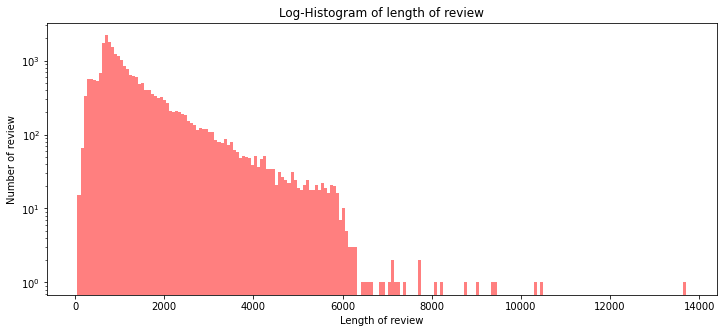

In [19]:
# ±×·¡ÇÁ¿¡ ´ëÇÑ ÀÌ¹ÌÁö »çÀÌÁî ¼±¾ð
# figsize: (°¡·Î, ¼¼·Î) ÇüÅÂÀÇ Æ©ÇÃ·Î ÀÔ·Â
plt.figure(figsize=(12, 5))
# È÷½ºÅä±×·¥ ¼±¾ð
# bins: È÷½ºÅä±×·¥ °ªµé¿¡ ´ëÇÑ ¹öÄÏ ¹üÀ§
# range: xÃà °ªÀÇ ¹üÀ§
# alpha: ±×·¡ÇÁ »ö»ó Åõ¸íµµ
# color: ±×·¡ÇÁ »ö»ó
# label: ±×·¡ÇÁ¿¡ ´ëÇÑ ¶óº§
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# ±×·¡ÇÁ Á¦¸ñ
plt.title('Log-Histogram of length of review')
# ±×·¡ÇÁ x Ãà ¶óº§
plt.xlabel('Length of review')
# ±×·¡ÇÁ y Ãà ¶óº§
plt.ylabel('Number of review')

In [20]:
print('¸®ºä ±æÀÌ ÃÖ´ë °ª: {}'.format(np.max(train_length)))
print('¸®ºä ±æÀÌ ÃÖ¼Ò °ª: {}'.format(np.min(train_length)))
print('¸®ºä ±æÀÌ Æò±Õ °ª: {:.2f}'.format(np.mean(train_length)))
print('¸®ºä ±æÀÌ Ç¥ÁØÆíÂ÷: {:.2f}'.format(np.std(train_length)))
print('¸®ºä ±æÀÌ Áß°£ °ª: {}'.format(np.median(train_length)))
# »çºÐÀ§ÀÇ ´ëÇÑ °æ¿ì´Â 0~100 ½ºÄÉÀÏ·Î µÇ¾îÀÖÀ½
print('¸®ºä ±æÀÌ Á¦ 1 »çºÐÀ§: {}'.format(np.percentile(train_length, 25)))
print('¸®ºä ±æÀÌ Á¦ 3 »çºÐÀ§: {}'.format(np.percentile(train_length, 75)))

¸®ºä ±æÀÌ ÃÖ´ë °ª: 13710
¸®ºä ±æÀÌ ÃÖ¼Ò °ª: 54
¸®ºä ±æÀÌ Æò±Õ °ª: 1329.71
¸®ºä ±æÀÌ Ç¥ÁØÆíÂ÷: 1005.22
¸®ºä ±æÀÌ Áß°£ °ª: 983.0
¸®ºä ±æÀÌ Á¦ 1 »çºÐÀ§: 705.0
¸®ºä ±æÀÌ Á¦ 3 »çºÐÀ§: 1619.0


{'boxes': [<matplotlib.lines.Line2D at 0x7efec4b20e10>],
 'caps': [<matplotlib.lines.Line2D at 0x7efec4b24e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7efec4b2e410>],
 'means': [<matplotlib.lines.Line2D at 0x7efec4b29e90>],
 'medians': [<matplotlib.lines.Line2D at 0x7efec4b29950>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7efec4b243d0>,
  <matplotlib.lines.Line2D at 0x7efec4b24910>]}

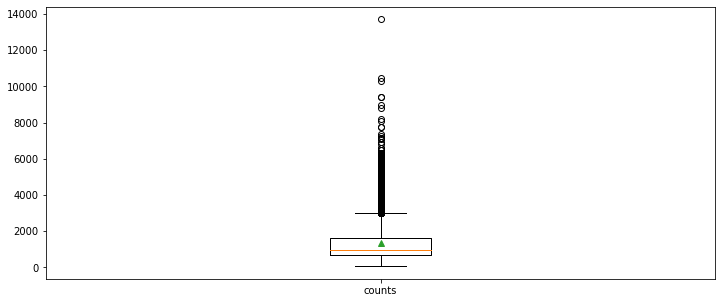

In [21]:
plt.figure(figsize=(12, 5))
# ¹Ú½ºÇÃ·Ô »ý¼º
# Ã¹¹øÂ° ÆÄ¶ó¸ÞÅÍ: ¿©·¯ ºÐÆ÷¿¡ ´ëÇÑ µ¥ÀÌÅÍ ¸®½ºÆ®¸¦ ÀÔ·Â
# labels: ÀÔ·ÂÇÑ µ¥ÀÌÅÍ¿¡ ´ëÇÑ ¶óº§
# showmeans: Æò±Õ°ªÀ» ¸¶Å©ÇÔ

plt.boxplot(train_length,
             labels=['counts'],
             showmeans=True)

### ¸¹ÀÌ »ç¿ëµÈ ´Ü¾î

(-0.5, 799.5, 599.5, -0.5)

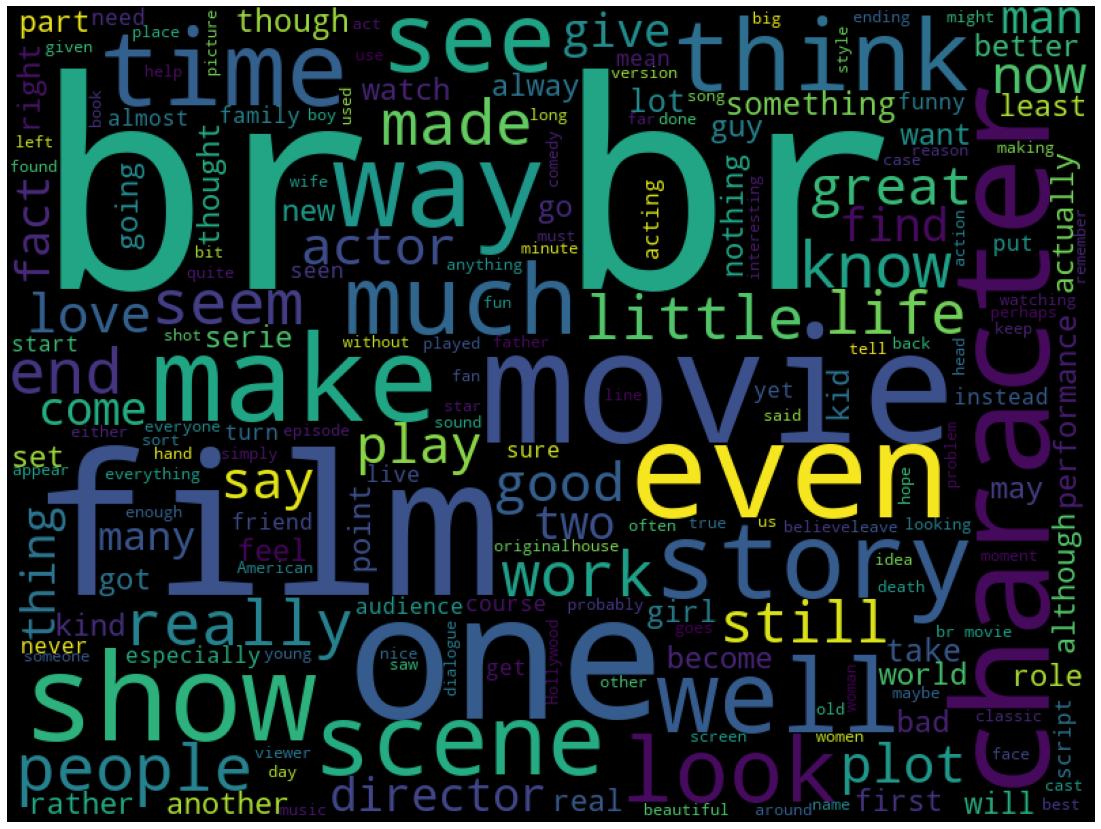

In [22]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['review']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

### ±à, ºÎÁ¤ µ¥ÀÌÅÍÀÇ ºÐÆ÷

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


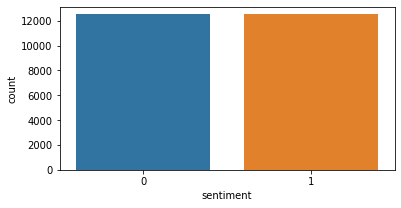

In [23]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['sentiment'])

In [24]:
print("±àÁ¤ ¸®ºä °³¼ö: {}".format(train_data['sentiment'].value_counts()[1]))
print("ºÎÁ¤ ¸®ºä °³¼ö: {}".format(train_data['sentiment'].value_counts()[0]))

±àÁ¤ ¸®ºä °³¼ö: 12500
ºÎÁ¤ ¸®ºä °³¼ö: 12500


### °¢ ¸®ºäÀÇ ´Ü¾î °³¼ö ºÐÆ÷

In [25]:
train_word_counts = train_data['review'].apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Number of reviews')

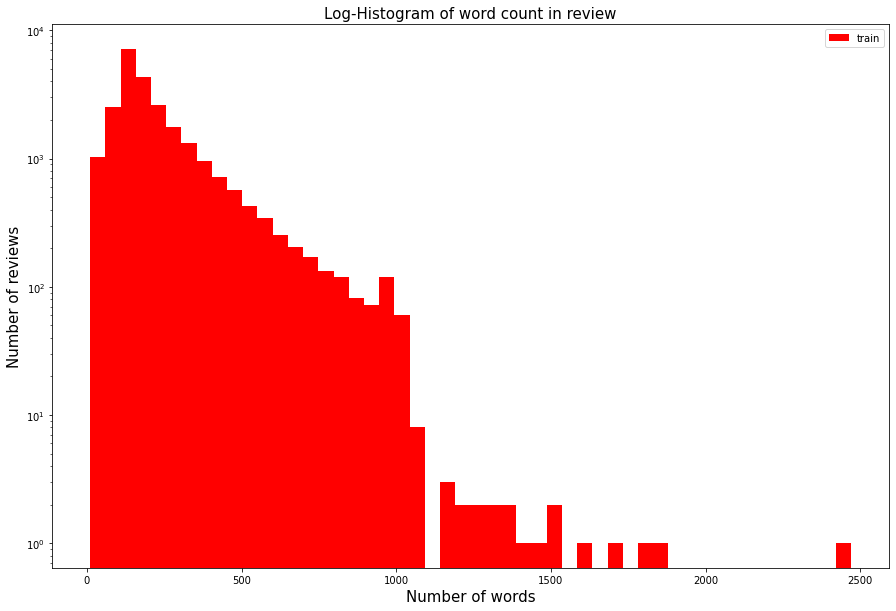

In [26]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [27]:
print('¸®ºä ´Ü¾î °³¼ö ÃÖ´ë °ª: {}'.format(np.max(train_word_counts)))
print('¸®ºä ´Ü¾î °³¼ö ÃÖ¼Ò °ª: {}'.format(np.min(train_word_counts)))
print('¸®ºä ´Ü¾î °³¼ö Æò±Õ °ª: {:.2f}'.format(np.mean(train_word_counts)))
print('¸®ºä ´Ü¾î °³¼ö Ç¥ÁØÆíÂ÷: {:.2f}'.format(np.std(train_word_counts)))
print('¸®ºä ´Ü¾î °³¼ö Áß°£ °ª: {}'.format(np.median(train_word_counts)))
# »çºÐÀ§ÀÇ ´ëÇÑ °æ¿ì´Â 0~100 ½ºÄÉÀÏ·Î µÇ¾îÀÖÀ½
print('¸®ºä ´Ü¾î °³¼ö Á¦ 1 »çºÐÀ§: {}'.format(np.percentile(train_word_counts, 25)))
print('¸®ºä ´Ü¾î °³¼ö Á¦ 3 »çºÐÀ§: {}'.format(np.percentile(train_word_counts, 75)))

¸®ºä ´Ü¾î °³¼ö ÃÖ´ë °ª: 2470
¸®ºä ´Ü¾î °³¼ö ÃÖ¼Ò °ª: 10
¸®ºä ´Ü¾î °³¼ö Æò±Õ °ª: 233.79
¸®ºä ´Ü¾î °³¼ö Ç¥ÁØÆíÂ÷: 173.74
¸®ºä ´Ü¾î °³¼ö Áß°£ °ª: 174.0
¸®ºä ´Ü¾î °³¼ö Á¦ 1 »çºÐÀ§: 127.0
¸®ºä ´Ü¾î °³¼ö Á¦ 3 »çºÐÀ§: 284.0


### Æ¯¼ö¹®ÀÚ ¹× ´ë, ¼Ò¹®ÀÚ ºñÀ²

In [28]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x)) # ¹°À½Ç¥°¡ ±¸µÎÁ¡À¸·Î ¾²ÀÓ
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x)) # ¸¶Ä§Ç¥
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper())) #  Ã¹¹øÂ° ´ë¹®ÀÚ
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x]))) # ´ë¹®ÀÚ°¡ ¸î°³
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x]))) # ¼ýÀÚ°¡ ¸î°³
                  
print('¹°À½Ç¥°¡ÀÖ´Â Áú¹®: {:.2f}%'.format(qmarks * 100))
print('¸¶Ä§Ç¥°¡ ÀÖ´Â Áú¹®: {:.2f}%'.format(fullstop * 100))
print('Ã¹ ±ÛÀÚ°¡ ´ë¹®ÀÚ ÀÎ Áú¹®: {:.2f}%'.format(capital_first * 100))
print('´ë¹®ÀÚ°¡ÀÖ´Â Áú¹®: {:.2f}%'.format(capitals * 100))
print('¼ýÀÚ°¡ÀÖ´Â Áú¹®: {:.2f}%'.format(numbers * 100))

¹°À½Ç¥°¡ÀÖ´Â Áú¹®: 29.55%
¸¶Ä§Ç¥°¡ ÀÖ´Â Áú¹®: 99.69%
Ã¹ ±ÛÀÚ°¡ ´ë¹®ÀÚ ÀÎ Áú¹®: 0.00%
´ë¹®ÀÚ°¡ÀÖ´Â Áú¹®: 99.59%
¼ýÀÚ°¡ÀÖ´Â Áú¹®: 56.66%


### µ¥ÀÌÅÍ ÀüÃ³¸®

µ¥ÀÌÅÍ ºÐ¼®°úÁ¤À» ¹ÙÅÁÀ¸·Î µ¥ÀÌÅÍ¸¦ ¸ðµ¨¿¡ Àû¿ë½ÃÅ°±â À§ÇØ ÀüÃ³¸® °úÁ¤À» ÁøÇàÇÑ´Ù.

In [56]:
import re
import json
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import nltk 
nltk.download('stopwords')
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [57]:
DATA_IN_PATH = './data_in/'

train_data = pd.read_csv( DATA_IN_PATH + 'labeledTrainData.tsv', header = 0, delimiter = '\t', quoting = 3)
print(train_data['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [58]:
review = train_data['review'][0] # ¸®ºä Áß ÇÏ³ª¸¦ °¡Á®¿Â´Ù.
review_text = BeautifulSoup(review,"html5lib").get_text() # HTML ÅÂ±× Á¦°Å
review_text = re.sub("[^a-zA-Z]", " ", review_text ) # ¿µ¾î ¹®ÀÚ¸¦ Á¦¿ÜÇÑ ³ª¸ÓÁö´Â ¸ðµÎ °ø¹éÀ¸·Î ¹Ù²Û´Ù.

In [59]:
print(review_text)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [60]:
stop_words = set(stopwords.words('english')) # ¿µ¾î ºÒ¿ë¾îµéÀÇ setÀ» ¸¸µç´Ù.

review_text = review_text.lower()
words = review_text.split() # ¼Ò¹®ÀÚ º¯È¯ ÈÄ ´Ü¾î¸¶´Ù ³ª´²¼­ ´Ü¾î ¸®½ºÆ®·Î ¸¸µç´Ù.
words = [w for w in words if not w in stop_words] # ºÒ¿ë¾î Á¦°ÅÇÑ ¸®½ºÆ®¸¦ ¸¸µç´Ù

In [61]:
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [62]:
clean_review = ' '.join(words) # ´Ü¾î ¸®½ºÆ®µéÀ» ´Ù½Ã ÇÏ³ªÀÇ ±Û·Î ÇÕÄ£´Ù.
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [63]:
def preprocessing( review, remove_stopwords = False ): 
    # ºÒ¿ë¾î Á¦°Å´Â ¿É¼ÇÀ¸·Î ¼±ÅÃ °¡´ÉÇÏ´Ù.
    
    # 1. HTML ÅÂ±× Á¦°Å
    review_text = BeautifulSoup(review, "html5lib").get_text()	

    # 2. ¿µ¾î°¡ ¾Æ´Ñ Æ¯¼ö¹®ÀÚµéÀ» °ø¹é(" ")À¸·Î ¹Ù²Ù±â
    review_text = re.sub("[^a-zA-Z]", " ", review_text)

    # 3. ´ë¹®ÀÚµéÀ» ¼Ò¹®ÀÚ·Î ¹Ù²Ù°í °ø¹é´ÜÀ§·Î ÅØ½ºÆ®µé ³ª´²¼­ ¸®½ºÆ®·Î ¸¸µç´Ù.
    words = review_text.lower().split()

    if remove_stopwords: 
        # 4. ºÒ¿ë¾îµéÀ» Á¦°Å
    
        #¿µ¾î¿¡ °ü·ÃµÈ ºÒ¿ë¾î ºÒ·¯¿À±â
        stops = set(stopwords.words("english"))
        # ºÒ¿ë¾î°¡ ¾Æ´Ñ ´Ü¾îµé·Î ÀÌ·ç¾îÁø »õ·Î¿î ¸®½ºÆ® »ý¼º
        words = [w for w in words if not w in stops]
        # 5. ´Ü¾î ¸®½ºÆ®¸¦ °ø¹éÀ» ³Ö¾î¼­ ÇÏ³ªÀÇ ±Û·Î ÇÕÄ£´Ù.	
        clean_review = ' '.join(words)

    else: # ºÒ¿ë¾î Á¦°ÅÇÏÁö ¾ÊÀ» ¶§
        clean_review = ' '.join(words)

    return clean_review

In [64]:
clean_train_reviews = []
for review in train_data['review']:
    clean_train_reviews.append(preprocessing(review, remove_stopwords = True))

# ÀüÃ³¸®ÇÑ µ¥ÀÌÅÍ Ãâ·Â
clean_train_reviews[0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [65]:
clean_train_df = pd.DataFrame({'review': clean_train_reviews, 'sentiment': train_data['sentiment']})

In [66]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)

In [67]:
print(text_sequences[0])

[404, 70, 419, 8815, 506, 2456, 115, 54, 873, 516, 178, 18686, 178, 11242, 165, 78, 14, 662, 2457, 117, 92, 10, 499, 4074, 165, 22, 210, 581, 2333, 1194, 11242, 71, 4826, 71, 635, 2, 253, 70, 11, 302, 1663, 486, 1144, 3265, 8815, 411, 793, 3342, 17, 441, 600, 1500, 15, 4424, 1851, 998, 146, 342, 1442, 743, 2424, 4, 8815, 418, 70, 637, 69, 237, 94, 541, 8815, 26055, 26056, 120, 1, 8815, 323, 8, 47, 20, 323, 167, 10, 207, 633, 635, 2, 116, 291, 382, 121, 15535, 3315, 1501, 574, 734, 10013, 923, 11578, 822, 1239, 1408, 360, 8815, 221, 15, 576, 8815, 22224, 2274, 13426, 734, 10013, 27, 28606, 340, 16, 41, 18687, 1500, 388, 11243, 165, 3962, 8815, 115, 627, 499, 79, 4, 8815, 1430, 380, 2163, 114, 1919, 2503, 574, 17, 60, 100, 4875, 5100, 260, 1268, 26057, 15, 574, 493, 744, 637, 631, 3, 394, 164, 446, 114, 615, 3266, 1160, 684, 48, 1175, 224, 1, 16, 4, 8815, 3, 507, 62, 25, 16, 640, 133, 231, 95, 7426, 600, 3439, 8815, 37248, 1864, 1, 128, 342, 1442, 247, 3, 865, 16, 42, 1487, 997, 2333, 12

In [68]:
word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0

In [69]:
print("ÀüÃ¼ ´Ü¾î °³¼ö: ", len(word_vocab))

ÀüÃ¼ ´Ü¾î °³¼ö:  74066


In [70]:
word_vocab

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'time': 6,
 'even': 7,
 'would': 8,
 'story': 9,
 'really': 10,
 'see': 11,
 'well': 12,
 'much': 13,
 'get': 14,
 'bad': 15,
 'people': 16,
 'also': 17,
 'first': 18,
 'great': 19,
 'made': 20,
 'way': 21,
 'make': 22,
 'could': 23,
 'movies': 24,
 'think': 25,
 'characters': 26,
 'character': 27,
 'watch': 28,
 'two': 29,
 'films': 30,
 'seen': 31,
 'many': 32,
 'life': 33,
 'plot': 34,
 'acting': 35,
 'never': 36,
 'love': 37,
 'little': 38,
 'best': 39,
 'show': 40,
 'know': 41,
 'ever': 42,
 'man': 43,
 'better': 44,
 'end': 45,
 'still': 46,
 'say': 47,
 'scene': 48,
 'scenes': 49,
 'go': 50,
 'something': 51,
 'back': 52,
 'real': 53,
 'watching': 54,
 'though': 55,
 'thing': 56,
 'old': 57,
 'years': 58,
 'actors': 59,
 'director': 60,
 'work': 61,
 'another': 62,
 'new': 63,
 'nothing': 64,
 'funny': 65,
 'actually': 66,
 'makes': 67,
 'look': 68,
 'find': 69,
 'going': 70,
 'part': 71,
 'lot': 72,
 'every': 73,
 'wo

In [71]:
data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

In [72]:
MAX_SEQUENCE_LENGTH = 174 

train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

print('Shape of train data: ', train_inputs.shape)

Shape of train data:  (25000, 174)


In [73]:
train_labels = np.array(train_data['sentiment'])
print('Shape of label tensor:', train_labels.shape)

Shape of label tensor: (25000,)


In [74]:
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
TRAIN_CLEAN_DATA = 'train_clean.csv'
DATA_CONFIGS = 'data_configs.json'

import os
# ÀúÀåÇÏ´Â µð·ºÅä¸®°¡ Á¸ÀçÇÏÁö ¾ÊÀ¸¸é »ý¼º
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)

In [75]:
# ÀüÃ³¸® µÈ µ¥ÀÌÅÍ¸¦ ³ÑÆÄÀÌ ÇüÅÂ·Î ÀúÀå
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)

# Á¤Á¦µÈ ÅØ½ºÆ®¸¦ csv ÇüÅÂ·Î ÀúÀå
clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index = False)


# µ¥ÀÌÅÍ »çÀüÀ» json ÇüÅÂ·Î ÀúÀå
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

In [76]:
test_data = pd.read_csv(DATA_IN_PATH + "testData.tsv", header=0, delimiter="\t", quoting=3)

clean_test_reviews = []
for review in test_data['review']:
    clean_test_reviews.append(preprocessing(review, remove_stopwords = True))


clean_test_df = pd.DataFrame({'review': clean_test_reviews, 'id': test_data['id']})
test_id = np.array(test_data['id'])

text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [77]:
TEST_INPUT_DATA = 'test_input.npy'
TEST_CLEAN_DATA = 'test_clean.csv'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_ID_DATA, 'wb'), test_id)
clean_test_df.to_csv(DATA_IN_PATH + TEST_CLEAN_DATA, index = False)

## 4.1.4 Logistic Regression Example with TF-IDF

### TF-IDF Feature Example

In [ ]:
import os

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
DATA_IN_PATH = './data_in/' 
DATA_OUT_PATH = './data_out/'
TRAIN_CLEAN_DATA = 'train_clean.csv'

RANDOM_SEED = 42
TEST_SPLIT = 0.2

In [ ]:
train_data = pd.read_csv( DATA_IN_PATH + TRAIN_CLEAN_DATA )

In [ ]:
reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])

In [ ]:
vectorizer = TfidfVectorizer(min_df = 0.0, analyzer="char", sublinear_tf=True, ngram_range=(1,3), max_features=5000) 

X = vectorizer.fit_transform(reviews)
y = np.array(sentiments)

In [ ]:
X

In [ ]:
features = vectorizer.get_feature_names()

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)

In [ ]:
lgs = LogisticRegression(class_weight='balanced') 
lgs.fit(X_train, y_train) 

In [ ]:
predicted = lgs.predict(X_eval)

In [ ]:
print("Accuracy: %f" % lgs.score(X_eval, y_eval))

In [ ]:
TEST_CLEAN_DATA = 'test_clean.csv'

test_data = pd.read_csv(DATA_IN_PATH + TEST_CLEAN_DATA)

In [ ]:
testDataVecs = vectorizer.transform(test_data['review'])

In [ ]:
test_predicted = lgs.predict(testDataVecs)
print(test_predicted)

In [ ]:
if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)

answer_dataset = pd.DataFrame({'id': test_data['id'], 'sentiment': test_predicted})
answer_dataset.to_csv(DATA_OUT_PATH + 'lgs_tfidf_answer.csv', index=False, quoting=3)

## 4.1.3 Linear Regression Example with Word2Vec

### Word2Vec Feature Example

In [ ]:
import os
import re

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
DATA_IN_PATH = './data_in/'
TRAIN_CLEAN_DATA = 'train_clean.csv'

RANDOM_SEED = 42
TEST_SPLIT = 0.2

In [ ]:
train_data = pd.read_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA)

In [ ]:
reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])

In [ ]:
sentences = []
for review in reviews:
    sentences.append(review.split())

In [ ]:
num_features = 300    
min_word_count = 40   
num_workers = 4       
context = 10          
downsampling = 1e-3 

In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
   level=logging.INFO)

In [ ]:
from gensim.models import word2vec

model = word2vec.Word2Vec(sentences, workers=num_workers, \
           size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

In [ ]:
def get_features(words, model, num_features):
    feature_vector = np.zeros((num_features),dtype=np.float32)

    num_words = 0
    index2word_set = set(model.wv.index2word)

    for w in words:
        if w in index2word_set:
            num_words += 1
            feature_vector = np.add(feature_vector, model[w])

    feature_vector = np.divide(feature_vector, num_words)
    return feature_vector

In [ ]:
def get_dataset(reviews, model, num_features):
    dataset = list()

    for s in reviews:
        dataset.append(get_features(s, model, num_features))

    reviewFeatureVecs = np.stack(dataset)
    
    return reviewFeatureVecs

In [ ]:
test_data_vecs = get_dataset(sentences, model, num_features)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

X = test_data_vecs
y = np.array(sentiments)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)

In [ ]:
from sklearn.linear_model import LogisticRegression

lgs = LogisticRegression(class_weight='balanced')
lgs.fit(X_train, y_train)

In [ ]:
print("Accuracy: %f" % lgs.score(X_test, y_test)) 

In [ ]:
TEST_CLEAN_DATA = 'test_clean.csv'

test_data = pd.read_csv(DATA_IN_PATH + TEST_CLEAN_DATA)

test_review = list(test_data['review'])

In [ ]:
test_data.head(5)

In [ ]:
test_sentences = list()
for review in test_review:
    test_sentences.append(review.split())

In [ ]:
test_data_vecs = get_dataset(test_sentences, model, num_features)

In [ ]:
DATA_OUT_PATH = './data_out/'

test_predicted = lgs.predict(test_data_vecs)

if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)
    
ids = list(test_data['id'])
answer_dataset = pd.DataFrame({'id': ids, 'sentiment': test_predicted})
answer_dataset.to_csv(DATA_OUT_PATH + 'lgs_w2v_answer.csv', index=False, quoting=3)

In [ ]:
model_name = "300features_40minwords_10context"
model.save(model_name)

# ÆÐÅ°Áö ¹× µ¥ÀÌÅÍ ºÒ·¯¿À±â ºÒ·¯¿À±â

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
DATA_IN_PATH = './data_in/'
DATA_OUT_PATH = './data_out/'
TRAIN_CLEAN_DATA = 'train_clean.csv'
TEST_SIZE = 0.2
RANDOM_SEED = 42

In [ ]:
train_data = pd.read_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA)

In [ ]:
reviews = list(train_data['review'])
y = np.array(train_data['sentiment'])

# CountVectorizer¸¦ È°¿ëÇÑ º¤ÅÍÈ­

In [ ]:
vectorizer = CountVectorizer(analyzer = "word", max_features = 5000) 

train_data_features = vectorizer.fit_transform(reviews)

# ÇÐ½À°ú °ËÁõ µ¥ÀÌÅÍ ºÐ¸®

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input, eval_input, train_label, eval_label = train_test_split(train_data_features, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)

# ¸ðµ¨ ±¸Çö ¹× ÇÐ½À 

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# ·£´ý Æ÷·¹½ºÆ® ºÐ·ù±â¿¡  100°³ ÀÇ»ç °áÁ¤ Æ®¸®¸¦ »ç¿ëÇÑ´Ù.
forest = RandomForestClassifier(n_estimators = 100) 

# ´Ü¾î ¹­À½À» º¤ÅÍÈ­ÇÑ µ¥ÀÌÅÍ¿Í Á¤´ä µ¥ÀÌÅÍ¸¦ °¡Áö°í ÇÐ½ÀÀ» ½ÃÀÛÇÑ´Ù.
forest.fit( train_input, train_label )

In [ ]:
print("Accuracy: %f" % forest.score(eval_input, eval_label))  # °ËÁõÇÔ¼ö·Î Á¤È®µµ ÃøÁ¤

# °ËÁõ µ¥ÀÌÅÍ¼ÂÀ¸·Î ¼º´É Æò°¡

In [ ]:
TEST_CLEAN_DATA = 'test_clean.csv'

test_data = pd.read_csv(DATA_IN_PATH + TEST_CLEAN_DATA)

test_reviews = list(test_data['review'])
ids = list(test_data['id'])

In [ ]:
test_data_features = vectorizer.transform(test_reviews)

# µ¥ÀÌÅÍ Á¦ÃâÇÏ±â

In [ ]:
if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)
    
# À§¿¡¼­ ¸¸µç ·£´ý Æ÷·¹½ºÆ® ºÐ·ù±â¸¦ ÅëÇØ ¿¹Ãø°ªÀ» °¡Á®¿Â´Ù.
result = forest.predict(test_data_features)

# ÆÇ´Ù½º µ¥ÀÌÅÍ ÇÁ·¹ÀÓÀ» ÅëÇØ µ¥ÀÌÅÍ¸¦ ±¸¼ºÇØ¼­ output¿¡ ³Ö´Â´Ù.
output = pd.DataFrame( data={"id": ids, "sentiment": result} )

# ÀÌÁ¦ csvÆÄÀÏ·Î ¸¸µç´Ù.
output.to_csv( DATA_OUT_PATH + "Bag_of_Words_model.csv", index=False, quoting=3 )

## ¸ðµâ ºÒ·¯¿À±â

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import os
import json

from tqdm import tqdm

## ½Ã°¢È­ ÇÔ¼ö

In [2]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

## ÇÐ½À µ¥ÀÌÅÍ °æ·Î Á¤ÀÇ 

In [3]:
DATA_IN_PATH = './data_in/'
DATA_OUT_PATH = './data_out/'
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

## ·£´ý ½Ãµå °íÁ¤

In [4]:
SEED_NUM = 1234
tf.random.set_seed(SEED_NUM)

## ÆÄÀÏ ·Îµå

In [5]:
train_input = np.load(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'rb'))
train_label = np.load(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'rb'))
prepro_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS, 'r'))

## ¸ðµ¨ ÇÏÀÌÆÛÆÄ¶ó¸ÞÅÍ Á¤ÀÇ

In [6]:
model_name = 'rnn_classifier_en'
BATCH_SIZE = 128
NUM_EPOCHS = 5
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs = {'model_name': model_name,
        'vocab_size': prepro_configs['vocab_size'],
        'embedding_dimension': 100,
        'dropout_rate': 0.2,
        'lstm_dimension': 150,
        'dense_dimension': 150,
        'output_dimension':1}

## ¸ðµ¨ ¼±¾ð ¹× ÄÄÆÄÀÏ

In [7]:
class RNNClassifier(tf.keras.Model):
    def __init__(self, **kargs):
        super(RNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'],
                                     output_dim=kargs['embedding_dimension'])
        self.lstm_1_layer = tf.keras.layers.LSTM(kargs['lstm_dimension'], return_sequences=True)
        self.lstm_2_layer = tf.keras.layers.LSTM(kargs['lstm_dimension'])
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        self.fc1 = layers.Dense(units=kargs['dense_dimension'],
                           activation=tf.keras.activations.tanh)
        self.fc2 = layers.Dense(units=kargs['output_dimension'],
                           activation=tf.keras.activations.sigmoid)
    
    def call(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = self.lstm_1_layer(x)
        x = self.lstm_2_layer(x)
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

In [8]:
model = RNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

## Callback ¼±¾ð

In [9]:
# overfittingÀ» ¸·±â À§ÇÑ ealrystop Ãß°¡
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=1)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1¹ø ÀÌ»ó »ó½ÂÀÌ ¾øÀ¸¸é Á¾·á)

checkpoint_path = DATA_OUT_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

./data_out/rnn_classifier_en -- Folder already exists 



## ¸ðµ¨ ÇÐ½À

In [10]:
history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22400/22500 [============================>.] - ETA: 0s - loss: 0.6931 - accuracy: 0.5059
Epoch 00001: val_accuracy improved from -inf to 0.51040, saving model to ./data_out/rnn_classifier_en/weights.h5
22500/22500 [==============================] - 162s 7ms/sample - loss: 0.6931 - accuracy: 0.5060 - val_loss: 0.6927 - val_accuracy: 0.5104
Epoch 2/5
22400/22500 [============================>.] - ETA: 0s - loss: 0.6894 - accuracy: 0.5236
Epoch 00002: val_accuracy improved from 0.51040 to 0.54960, saving model to ./data_out/rnn_classifier_en/weights.h5
22500/22500 [==============================] - 159s 7ms/sample - loss: 0.6893 - accuracy: 0.5240 - val_loss: 0.6825 - val_accuracy: 0.5496
Epoch 3/5
22400/22500 [============================>.] - ETA: 0s - loss: 0.4373 - accuracy: 0.7844
Epoch 00003: val_accuracy improved from 0.54960 to 0.87920, saving model to ./data_out/rnn_classifier_en/weights.h5
22500/22500 [==================

## °á°ú ÇÃ·Ô

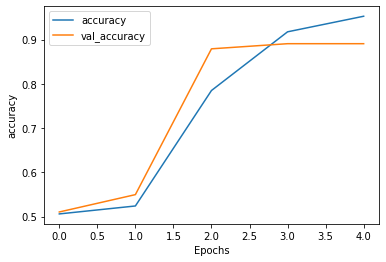

In [11]:
plot_graphs(history, 'accuracy')

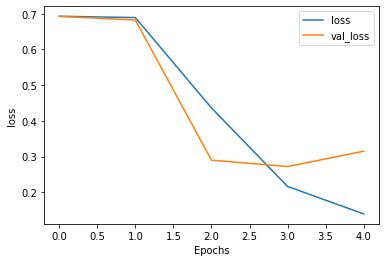

In [12]:
plot_graphs(history, 'loss')

## Å×½ºÆ® µ¥ÀÌÅÍ ºÒ·¯¿À±â

In [13]:
DATA_OUT_PATH = './data_out/'
TEST_INPUT_DATA = 'test_input.npy'
TEST_ID_DATA = 'test_id.npy'


test_input = np.load(open(DATA_IN_PATH + TEST_INPUT_DATA, 'rb'))
test_input = pad_sequences(test_input, maxlen=test_input.shape[1])

## º£½ºÆ® ¸ðµ¨ ºÒ·¯¿À±â

In [14]:
SAVE_FILE_NM = 'weights.h5'

model.load_weights(os.path.join(DATA_OUT_PATH, model_name, SAVE_FILE_NM))

## Å×½ºÆ® µ¥ÀÌÅÍ ¿¹ÃøÇÏ±â

In [21]:
predictions = model.predict(test_input, batch_size=BATCH_SIZE)
predictions = predictions.squeeze(-1)

In [22]:
test_id = np.load(open(DATA_IN_PATH + TEST_ID_DATA, 'rb'), allow_pickle=True)

if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)

output = pd.DataFrame(data={"id": list(test_id), "sentiment":list(predictions)})
output.to_csv(DATA_OUT_PATH + 'movie_review_result_rnn.csv', index=False, quoting=3)

## ¸ðµâ ºÒ·¯¿À±â

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import os
import json

from tqdm import tqdm

## ½Ã°¢È­ ÇÔ¼ö

In [2]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

## ÇÐ½À µ¥ÀÌÅÍ °æ·Î Á¤ÀÇ

In [3]:
DATA_IN_PATH = './data_in/'
DATA_OUT_PATH = './data_out/'
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

## ·£´ý ½Ãµå °íÁ¤

In [4]:
SEED_NUM = 1234
tf.random.set_seed(SEED_NUM)

## ÆÄÀÏ ·Îµå

In [5]:
train_input = np.load(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'rb'))
train_label = np.load(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'rb'))
prepro_configs = prepro_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS, 'r'))

## ¸ðµ¨ ÇÏÀÌÆÛÆÄ¶ó¸ÞÅÍ Á¤ÀÇ

In [6]:
model_name = 'cnn_classifier_en'
BATCH_SIZE = 512
NUM_EPOCHS = 2
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs = {'model_name': model_name,
        'vocab_size': prepro_configs['vocab_size'],
        'embedding_size': 128,
        'num_filters': 100,
        'dropout_rate': 0.5,
        'hidden_dimension': 250,
        'output_dimension':1}

## ¸ðµ¨ ¼±¾ð ¹× ÄÄÆÄÀÏ

In [7]:
class CNNClassifier(tf.keras.Model):
    
    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'],
                                     output_dim=kargs['embedding_size'])
        self.conv_list = [layers.Conv1D(filters=kargs['num_filters'],
                                   kernel_size=kernel_size,
                                   padding='valid',
                                   activation=tf.keras.activations.relu,
                                   kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
                     for kernel_size in [3,4,5]]
        self.pooling = layers.GlobalMaxPooling1D()
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                           activation=tf.keras.activations.relu,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
        self.fc2 = layers.Dense(units=kargs['output_dimension'],
                           activation=tf.keras.activations.sigmoid,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    
    def call(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis=-1)
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x

In [8]:
model = CNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

## Callback ¼±¾ð

In [9]:
# overfittingÀ» ¸·±â À§ÇÑ ealrystop Ãß°¡
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=2)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1¹ø ÀÌ»ó »ó½ÂÀÌ ¾øÀ¸¸é Á¾·á)\

checkpoint_path = DATA_OUT_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

./data_out/cnn_classifier_en -- Folder already exists 



## ¸ðµ¨ ÇÐ½À

In [10]:
history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

Epoch 1/2
44/44 [==============================] - ETA: 0s - loss: 0.6709 - accuracy: 0.5958
Epoch 00001: val_accuracy improved from -inf to 0.77560, saving model to ./data_out/cnn_classifier_en\weights.h5
44/44 [==============================] - 4s 84ms/step - loss: 0.6709 - accuracy: 0.5958 - val_loss: 0.5596 - val_accuracy: 0.7756
Epoch 2/2
44/44 [==============================] - ETA: 0s - loss: 0.3790 - accuracy: 0.8400
Epoch 00002: val_accuracy improved from 0.77560 to 0.87760, saving model to ./data_out/cnn_classifier_en\weights.h5
44/44 [==============================] - 3s 76ms/step - loss: 0.3790 - accuracy: 0.8400 - val_loss: 0.3092 - val_accuracy: 0.8776


## °á°ú ÇÃ·Ô

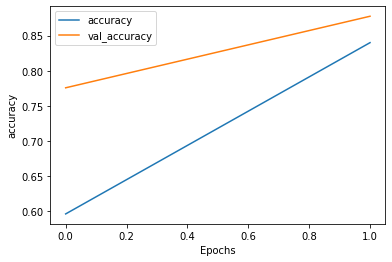

In [11]:
plot_graphs(history, 'accuracy')

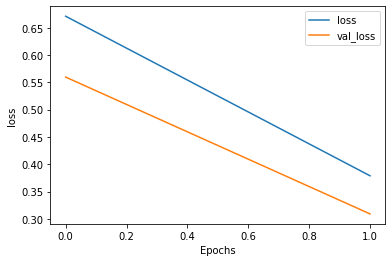

In [12]:
plot_graphs(history, 'loss')

## Å×½ºÆ® µ¥ÀÌÅÍ ºÒ·¯¿À±â

In [13]:
DATA_OUT_PATH = './data_out/'
TEST_INPUT_DATA = 'test_input.npy'
TEST_ID_DATA = 'test_id.npy'

test_input = np.load(open(DATA_IN_PATH + TEST_INPUT_DATA, 'rb'))
test_input = pad_sequences(test_input, maxlen=test_input.shape[1])

## º£½ºÆ® ¸ðµ¨ ºÒ·¯¿À±â

In [14]:
SAVE_FILE_NM = 'weights.h5'

model.load_weights(os.path.join(DATA_OUT_PATH, model_name, SAVE_FILE_NM))

## Å×½ºÆ® µ¥ÀÌÅÍ ¿¹ÃøÇÏ±â

In [15]:
predictions = model.predict(test_input, batch_size=BATCH_SIZE)
predictions = predictions.squeeze(-1)

In [16]:
test_id = np.load(open(DATA_IN_PATH + TEST_ID_DATA, 'rb'), allow_pickle=True)

if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)

output = pd.DataFrame(data={"id": list(test_id), "sentiment": list(predictions)} )
output.to_csv(DATA_OUT_PATH + 'movie_review_result_cnn.csv', index=False, quoting=3)

## 4.2.2. µ¥ÀÌÅÍ ºÐ¼® ¹× ÀüÃ³¸®

### µ¥ÀÌÅÍ ºÐ¼®ÇÏ±â

In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [2]:
DATA_IN_PATH = './data_in/'

In [3]:
print("ÆÄÀÏ Å©±â : ")
for file in os.listdir(DATA_IN_PATH):
    if 'txt' in file :
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

ÆÄÀÏ Å©±â : 
ratings.txt                   19.72MB
ratings_test.txt              4.94MB
ratings_train.txt             14.78MB


In [4]:
train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header = 0, delimiter = '\t', quoting = 3)
train_data.head()

id                                           document  label
0   9976970                                ¾Æ ´õºù.. ÁøÂ¥ Â¥Áõ³ª³×¿ä ¸ñ¼Ò¸®      0
1   3819312                  Èì...Æ÷½ºÅÍº¸°í ÃÊµù¿µÈ­ÁÙ....¿À¹ö¿¬±âÁ¶Â÷ °¡º±Áö ¾Ê±¸³ª      1
2  10265843                                  ³Ê¹«Àç“J¾ú´Ù±×·¡¼­º¸´Â°ÍÀ»ÃßÃµÇÑ´Ù      0
3   9045019                      ±³µµ¼Ò ÀÌ¾ß±â±¸¸Õ ..¼ÖÁ÷È÷ Àç¹Ì´Â ¾ø´Ù..ÆòÁ¡ Á¶Á¤      0
4   6483659  »çÀÌ¸óÆä±×ÀÇ ÀÍ»ì½º·± ¿¬±â°¡ µ¸º¸¿´´ø ¿µÈ­!½ºÆÄÀÌ´õ¸Ç¿¡¼­ ´Ä¾îº¸ÀÌ±â¸¸ Çß´ø Ä¿½ºÆ¾ ...      1

In [5]:
print('ÀüÃ¼ ÇÐ½Àµ¥ÀÌÅÍÀÇ °³¼ö: {}'.format(len(train_data)))

ÀüÃ¼ ÇÐ½Àµ¥ÀÌÅÍÀÇ °³¼ö: 150000


In [6]:
train_length = train_data['document'].astype(str).apply(len)

In [7]:
train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

c:\users\sk8er\anaconda3\envs\pr_tensorflow\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, 'Number of review')

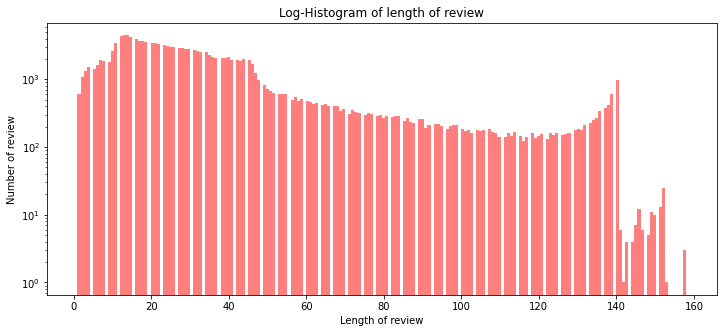

In [8]:
# ±×·¡ÇÁ¿¡ ´ëÇÑ ÀÌ¹ÌÁö »çÀÌÁî ¼±¾ð
# figsize: (°¡·Î, ¼¼·Î) ÇüÅÂÀÇ Æ©ÇÃ·Î ÀÔ·Â
plt.figure(figsize=(12, 5))
# È÷½ºÅä±×·¥ ¼±¾ð
# bins: È÷½ºÅä±×·¥ °ªµé¿¡ ´ëÇÑ ¹öÄÏ ¹üÀ§
# range: xÃà °ªÀÇ ¹üÀ§
# alpha: ±×·¡ÇÁ »ö»ó Åõ¸íµµ
# color: ±×·¡ÇÁ »ö»ó
# label: ±×·¡ÇÁ¿¡ ´ëÇÑ ¶óº§
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# ±×·¡ÇÁ Á¦¸ñ
plt.title('Log-Histogram of length of review')
# ±×·¡ÇÁ x Ãà ¶óº§
plt.xlabel('Length of review')
# ±×·¡ÇÁ y Ãà ¶óº§
plt.ylabel('Number of review')

In [9]:
print('¸®ºä ±æÀÌ ÃÖ´ë °ª: {}'.format(np.max(train_length)))
print('¸®ºä ±æÀÌ ÃÖ¼Ò °ª: {}'.format(np.min(train_length)))
print('¸®ºä ±æÀÌ Æò±Õ °ª: {:.2f}'.format(np.mean(train_length)))
print('¸®ºä ±æÀÌ Ç¥ÁØÆíÂ÷: {:.2f}'.format(np.std(train_length)))
print('¸®ºä ±æÀÌ Áß°£ °ª: {}'.format(np.median(train_length)))
# »çºÐÀ§ÀÇ ´ëÇÑ °æ¿ì´Â 0~100 ½ºÄÉÀÏ·Î µÇ¾îÀÖÀ½
print('¸®ºä ±æÀÌ Á¦ 1 »çºÐÀ§: {}'.format(np.percentile(train_length, 25)))
print('¸®ºä ±æÀÌ Á¦ 3 »çºÐÀ§: {}'.format(np.percentile(train_length, 75)))

¸®ºä ±æÀÌ ÃÖ´ë °ª: 158
¸®ºä ±æÀÌ ÃÖ¼Ò °ª: 1
¸®ºä ±æÀÌ Æò±Õ °ª: 35.24
¸®ºä ±æÀÌ Ç¥ÁØÆíÂ÷: 29.58
¸®ºä ±æÀÌ Áß°£ °ª: 27.0
¸®ºä ±æÀÌ Á¦ 1 »çºÐÀ§: 16.0
¸®ºä ±æÀÌ Á¦ 3 »çºÐÀ§: 42.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1866fd5e278>,
 'caps': [<matplotlib.lines.Line2D at 0x1866fd5e828>,
 'boxes': [<matplotlib.lines.Line2D at 0x1866f9e4e10>],
 'medians': [<matplotlib.lines.Line2D at 0x1866fd5edd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1866fd6a2e8>],
 'means': [<matplotlib.lines.Line2D at 0x1866fd6a0f0>]}

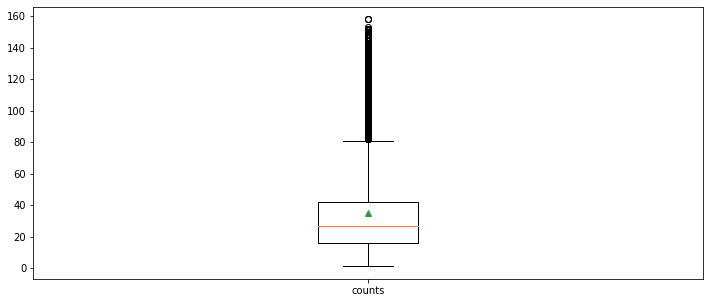

In [10]:
plt.figure(figsize=(12, 5))
# ¹Ú½ºÇÃ·Ô »ý¼º
# Ã¹¹øÂ° ÆÄ¶ó¸ÞÅÍ: ¿©·¯ ºÐÆ÷¿¡ ´ëÇÑ µ¥ÀÌÅÍ ¸®½ºÆ®¸¦ ÀÔ·Â
# labels: ÀÔ·ÂÇÑ µ¥ÀÌÅÍ¿¡ ´ëÇÑ ¶óº§
# showmeans: Æò±Õ°ªÀ» ¸¶Å©ÇÔ

plt.boxplot(train_length,
             labels=['counts'],
             showmeans=True)

In [11]:
train_review = [review for review in train_data['document'] if type(review) is str]

In [12]:
wordclud = WordCloud(font_path = DATA_IN_PATH + 'NanumGothic.ttf').generate(' '.join(train_review))

c:\users\sk8er\anaconda3\envs\pr_tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

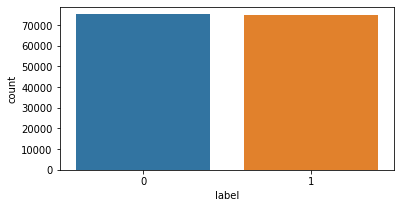

In [13]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['label'])

In [14]:
print("±àÁ¤ ¸®ºä °³¼ö: {}".format(train_data['label'].value_counts()[1]))
print("ºÎÁ¤ ¸®ºä °³¼ö: {}".format(train_data['label'].value_counts()[0]))

±àÁ¤ ¸®ºä °³¼ö: 74827
ºÎÁ¤ ¸®ºä °³¼ö: 75173


In [15]:
train_word_counts = train_data['document'].astype(str).apply(lambda x:len(x.split(' ')))

c:\users\sk8er\anaconda3\envs\pr_tensorflow\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Number of reviews')

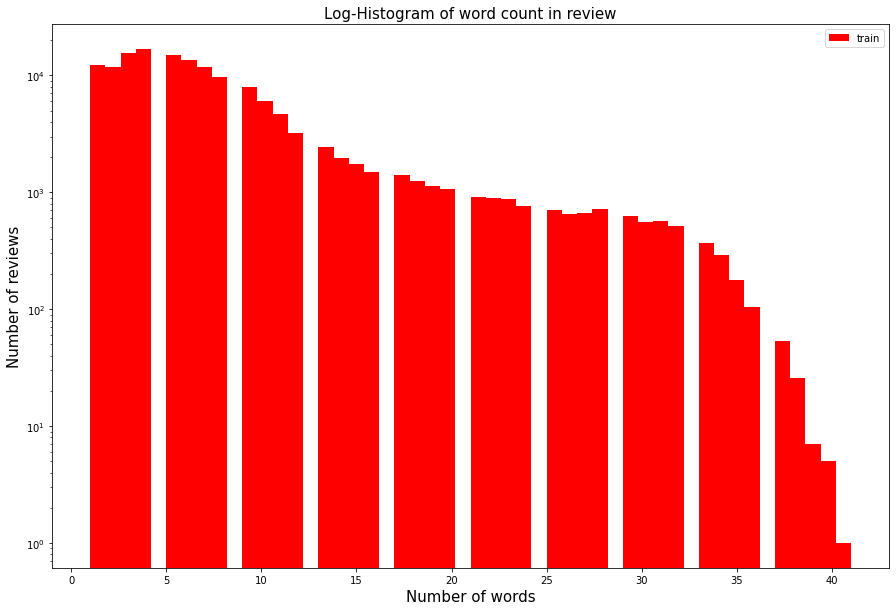

In [16]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [17]:
print('¸®ºä ´Ü¾î °³¼ö ÃÖ´ë °ª: {}'.format(np.max(train_word_counts)))
print('¸®ºä ´Ü¾î °³¼ö ÃÖ¼Ò °ª: {}'.format(np.min(train_word_counts)))
print('¸®ºä ´Ü¾î °³¼ö Æò±Õ °ª: {:.2f}'.format(np.mean(train_word_counts)))
print('¸®ºä ´Ü¾î °³¼ö Ç¥ÁØÆíÂ÷: {:.2f}'.format(np.std(train_word_counts)))
print('¸®ºä ´Ü¾î °³¼ö Áß°£ °ª: {}'.format(np.median(train_word_counts)))
# »çºÐÀ§ÀÇ ´ëÇÑ °æ¿ì´Â 0~100 ½ºÄÉÀÏ·Î µÇ¾îÀÖÀ½
print('¸®ºä ´Ü¾î °³¼ö Á¦ 1 »çºÐÀ§: {}'.format(np.percentile(train_word_counts, 25)))
print('¸®ºä ´Ü¾î °³¼ö Á¦ 3 »çºÐÀ§: {}'.format(np.percentile(train_word_counts, 75)))

¸®ºä ´Ü¾î °³¼ö ÃÖ´ë °ª: 41
¸®ºä ´Ü¾î °³¼ö ÃÖ¼Ò °ª: 1
¸®ºä ´Ü¾î °³¼ö Æò±Õ °ª: 7.58
¸®ºä ´Ü¾î °³¼ö Ç¥ÁØÆíÂ÷: 6.51
¸®ºä ´Ü¾î °³¼ö Áß°£ °ª: 6.0
¸®ºä ´Ü¾î °³¼ö Á¦ 1 »çºÐÀ§: 3.0
¸®ºä ´Ü¾î °³¼ö Á¦ 3 »çºÐÀ§: 9.0


In [18]:
qmarks = np.mean(train_data['document'].astype(str).apply(lambda x: '?' in x)) # ¹°À½Ç¥°¡ ±¸µÎÁ¡À¸·Î ¾²ÀÓ
fullstop = np.mean(train_data['document'].astype(str).apply(lambda x: '.' in x)) # ¸¶Ä§Ç¥
                  
print('¹°À½Ç¥°¡ÀÖ´Â Áú¹®: {:.2f}%'.format(qmarks * 100))
print('¸¶Ä§Ç¥°¡ ÀÖ´Â Áú¹®: {:.2f}%'.format(fullstop * 100))

¹°À½Ç¥°¡ÀÖ´Â Áú¹®: 8.25%
¸¶Ä§Ç¥°¡ ÀÖ´Â Áú¹®: 51.76%


### µ¥ÀÌÅÍ ÀüÃ³¸®

In [19]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [20]:
DATA_IN_PATH ='./data_in/'

train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header=0, delimiter='\t', quoting=3 )

print(train_data.head())

         id                                           document  label
0   9976970                                ¾Æ ´õºù.. ÁøÂ¥ Â¥Áõ³ª³×¿ä ¸ñ¼Ò¸®      0
1   3819312                  Èì...Æ÷½ºÅÍº¸°í ÃÊµù¿µÈ­ÁÙ....¿À¹ö¿¬±âÁ¶Â÷ °¡º±Áö ¾Ê±¸³ª      1
2  10265843                                  ³Ê¹«Àç“J¾ú´Ù±×·¡¼­º¸´Â°ÍÀ»ÃßÃµÇÑ´Ù      0
3   9045019                      ±³µµ¼Ò ÀÌ¾ß±â±¸¸Õ ..¼ÖÁ÷È÷ Àç¹Ì´Â ¾ø´Ù..ÆòÁ¡ Á¶Á¤      0
4   6483659  »çÀÌ¸óÆä±×ÀÇ ÀÍ»ì½º·± ¿¬±â°¡ µ¸º¸¿´´ø ¿µÈ­!½ºÆÄÀÌ´õ¸Ç¿¡¼­ ´Ä¾îº¸ÀÌ±â¸¸ Çß´ø Ä¿½ºÆ¾ ...      1


In [21]:
review_text = re.sub("[^°¡-ÆR¤¡-¤¾¤¿-¤Ó\\s]", "", train_data['document'][0]) 
print(review_text)

¾Æ ´õºù ÁøÂ¥ Â¥Áõ³ª³×¿ä ¸ñ¼Ò¸®


In [22]:
okt=Okt()
review_text = okt.morphs(review_text, stem=True)
print(review_text)

['¾Æ', '´õºù', 'ÁøÂ¥', 'Â¥Áõ³ª´Ù', '¸ñ¼Ò¸®']


In [23]:
stop_words = set(['Àº', '´Â', 'ÀÌ', '°¡', 'ÇÏ', '¾Æ', '°Í', 'µé','ÀÇ', 'ÀÖ', 'µÇ', '¼ö', 'º¸', 'ÁÖ', 'µî', 'ÇÑ'])
clean_review = [token for token in review_text if not token in stop_words]
print(clean_review)

['´õºù', 'ÁøÂ¥', 'Â¥Áõ³ª´Ù', '¸ñ¼Ò¸®']


In [24]:
stop_words = set(['Àº', '´Â', 'ÀÌ', '°¡', 'ÇÏ', '¾Æ', '°Í', 'µé','ÀÇ', 'ÀÖ', 'µÇ', '¼ö', 'º¸', 'ÁÖ', 'µî', 'ÇÑ'])

In [25]:
def preprocessing(review, okt, remove_stopwords = False, stop_words = []):
    # ÇÔ¼öÀÇ ÀÎÀÚ´Â ´ÙÀ½°ú °°´Ù.
    # review : ÀüÃ³¸®ÇÒ ÅØ½ºÆ®
    # okt : okt °´Ã¼¸¦ ¹Ýº¹ÀûÀ¸·Î »ý¼ºÇÏÁö ¾Ê°í ¹Ì¸® »ý¼ºÈÄ ÀÎÀÚ·Î ¹Þ´Â´Ù.
    # remove_stopword : ºÒ¿ë¾î¸¦ Á¦°ÅÇÒÁö ¼±ÅÃ ±âº»°ªÀº False
    # stop_word : ºÒ¿ë¾î »çÀüÀº »ç¿ëÀÚ°¡ Á÷Á¢ ÀÔ·ÂÇØ¾ßÇÔ ±âº»°ªÀº ºñ¾îÀÖ´Â ¸®½ºÆ®
    
    # 1. ÇÑ±Û ¹× °ø¹éÀ» Á¦¿ÜÇÑ ¹®ÀÚ ¸ðµÎ Á¦°Å.
    review_text = re.sub("[^°¡-ÆR¤¡-¤¾¤¿-¤Ó\\s]", "", review)
    
    # 2. okt °´Ã¼¸¦ È°¿ëÇØ¼­ ÇüÅÂ¼Ò ´ÜÀ§·Î ³ª´«´Ù.
    word_review = okt.morphs(review_text, stem=True)
    
    if remove_stopwords:
        
        # ºÒ¿ë¾î Á¦°Å(¼±ÅÃÀû)
        word_review = [token for token in word_review if not token in stop_words]
        
   
    return word_review

In [26]:
stop_words = [ 'Àº', '´Â', 'ÀÌ', '°¡', 'ÇÏ', '¾Æ', '°Í', 'µé','ÀÇ', 'ÀÖ', 'µÇ', '¼ö', 'º¸', 'ÁÖ', 'µî', 'ÇÑ']
okt = Okt()
clean_train_review = []

for review in train_data['document']:
    # ºñ¾îÀÖ´Â µ¥ÀÌÅÍ¿¡¼­ ¸ØÃßÁö ¾Êµµ·Ï stringÀÎ °æ¿ì¸¸ ÁøÇà
    if type(review) == str:
        clean_train_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_train_review.append([])  #stringÀÌ ¾Æ´Ï¸é ºñ¾îÀÖ´Â °ª Ãß°¡

In [27]:
test_data = pd.read_csv(DATA_IN_PATH + 'ratings_test.txt', header=0, delimiter='\t', quoting=3 )

clean_test_review = []

for review in test_data['document']:
    # ºñ¾îÀÖ´Â µ¥ÀÌÅÍ¿¡¼­ ¸ØÃßÁö ¾Êµµ·Ï stringÀÎ °æ¿ì¸¸ ÁøÇà
    if type(review) == str:
        clean_test_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_test_review.append([])  #stringÀÌ ¾Æ´Ï¸é ºñ¾îÀÖ´Â °ª Ãß°¡

In [28]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index # ´Ü¾î »çÀü ÇüÅÂ
word_vocab["<PAD>"] = 0

In [29]:
MAX_SEQUENCE_LENGTH = 8 # ¹®Àå ÃÖ´ë ±æÀÌ

train_inputs = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post') # ÇÐ½À µ¥ÀÌÅÍ¸¦ º¤ÅÍÈ­
train_labels = np.array(train_data['label']) # ÇÐ½À µ¥ÀÌÅÍÀÇ ¶óº§

test_inputs = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post') # Å×½ºÆ® µ¥ÀÌÅÍ¸¦ º¤ÅÍÈ­
test_labels = np.array(test_data['label']) # Å×½ºÆ® µ¥ÀÌÅÍÀÇ ¶óº§

In [30]:
DATA_IN_PATH = './data_in/'
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) # vocab size Ãß°¡

import os
# ÀúÀåÇÏ´Â µð·ºÅä¸®°¡ Á¸ÀçÇÏÁö ¾ÊÀ¸¸é »ý¼º
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)

# ÀüÃ³¸® µÈ ÇÐ½À µ¥ÀÌÅÍ¸¦ ³ÑÆÄÀÌ ÇüÅÂ·Î ÀúÀå
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)
# ÀüÃ³¸® µÈ Å×½ºÆ® µ¥ÀÌÅÍ¸¦ ³ÑÆÄÀÌ ÇüÅÂ·Î ÀúÀå
np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_LABEL_DATA, 'wb'), test_labels)

# µ¥ÀÌÅÍ »çÀüÀ» json ÇüÅÂ·Î ÀúÀå
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

## ¸ðµâ ºÒ·¯¿À±â

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import os
import json

from tqdm import tqdm

## ½Ã°¢È­ ÇÔ¼ö

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

## ÇÐ½À µ¥ÀÌÅÍ °æ·Î Á¤ÀÇ

In [ ]:
DATA_IN_PATH = './data_in/'
DATA_OUT_PATH = './data_out/'
INPUT_TRAIN_DATA = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

## ·£´ý ½Ãµå °íÁ¤

In [ ]:
SEED_NUM = 1234
tf.random.set_seed(SEED_NUM)

## ÆÄÀÏ ·Îµå

In [ ]:
train_input = np.load(open(DATA_IN_PATH + INPUT_TRAIN_DATA, 'rb'))
train_label = np.load(open(DATA_IN_PATH + LABEL_TRAIN_DATA, 'rb'))
prepro_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS, 'r'))

## ¸ðµ¨ ÇÏÀÌÆÛÆÄ¶ó¸ÞÅÍ Á¤ÀÇ

In [ ]:
model_name = 'cnn_classifier_kr'
BATCH_SIZE = 512
NUM_EPOCHS = 10
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs = {'model_name': model_name,
        'vocab_size': prepro_configs['vocab_size'],
        'embedding_size': 128,
        'num_filters': 100,
        'dropout_rate': 0.5,
        'hidden_dimension': 250,
        'output_dimension':1}

## ¸ðµ¨ ¼±¾ð ¹× ÄÄÆÄÀÏ

In [ ]:
class CNNClassifier(tf.keras.Model):
    
    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'],
                                     output_dim=kargs['embedding_size'])
        self.conv_list = [layers.Conv1D(filters=kargs['num_filters'],
                                   kernel_size=kernel_size,
                                   padding='valid',
                                   activation=tf.keras.activations.relu,
                                   kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
                     for kernel_size in [3,4,5]]
        self.pooling = layers.GlobalMaxPooling1D()
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                           activation=tf.keras.activations.relu,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
        self.fc2 = layers.Dense(units=kargs['output_dimension'],
                           activation=tf.keras.activations.sigmoid,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    
    def call(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis=-1)
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x

In [ ]:
model = CNNClassifier(**kargs)

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

## Callback ¼±¾ð

In [ ]:
# overfittingÀ» ¸·±â À§ÇÑ ealrystop Ãß°¡
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=2)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1¹ø ÀÌ»ó »ó½ÂÀÌ ¾øÀ¸¸é Á¾·á)\

checkpoint_path = DATA_OUT_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

## ¸ðµ¨ ÇÐ½À

In [ ]:
history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

## °á°ú ÇÃ·Ô

In [ ]:
plot_graphs(history, 'loss')

In [ ]:
plot_graphs(history, 'accuracy')

## °á°ú Æò°¡ÇÏ±â

In [ ]:
DATA_OUT_PATH = './data_out/'
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'
SAVE_FILE_NM = 'weights.h5' #ÀúÀåµÈ best model ÀÌ¸§

test_input = np.load(open(DATA_IN_PATH + INPUT_TEST_DATA, 'rb'))
test_input = pad_sequences(test_input, maxlen=test_input.shape[1])
test_label_data = np.load(open(DATA_IN_PATH + LABEL_TEST_DATA, 'rb'))

In [ ]:
model.load_weights(os.path.join(DATA_OUT_PATH, model_name, SAVE_FILE_NM))

In [ ]:
model.evaluate(test_input, test_label_data)